<a href="https://colab.research.google.com/github/RedaElmar/Sentiments_Analysis_Darija_Tweets/blob/main/Sentiments_Analysis_Darija_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aaransia
import pandas as pd
from aaransia import transliterate, SourceLanguageError
import re
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import logging

In [ ]:
# Load train
df = pd.read_csv('Train.csv', lineterminator='\n')
df['text'] = df['text'].astype(str) # One row has a float as the text
print(df.shape)
df.head()

(8401, 3)


,ID,text,label
0,IQOTJAT,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1
1,HY9M63D,Ya m3alllam,1
2,7SV55S2,Ma7lek! Zin ou fannena 7loua.,1
3,KDLJVZR,hhhhh ya bliiiiiiiida ya Hanen,0
4,0MAU5GY,Nikraha w ma5yebha pffff,0


In [ ]:
EMOTICONS = {
    u":)":"Happy face or smiley",u":D":"Happy face or smiley",    u"<3":"Happy face or smiley",    u":*":"Happy face or smiley",    u":p":"Happy face or smiley",    u":P":"Happy face or smiley",    u"xD":"Happy face or smiley",    u"XD":"Happy face or smiley",    u":â€‘\)":"Happy face or smiley",    u":\)":"Happy face or smiley",    u":-\]":"Happy face or smiley",    u":\]":"Happy face or smiley",    u":-3":"Happy face smiley",    u":3":"Happy face smiley",    u":->":"Happy face smiley",    u":>":"Happy face smiley",    u"8-\)":"Happy face smiley",    u":o\)":"Happy face smiley",    u":-\}":"Happy face smiley",    u":\}":"Happy face smiley",    u":-\)":"Happy face smiley",    u":c\)":"Happy face smiley",    u":\^\)":"Happy face smiley",    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",    u":â€‘D":"Laughing, big grin or laugh with glasses",    u":D":"Laughing, big grin or laugh with glasses",    u"8â€‘D":"Laughing, big grin or laugh with glasses",    u"8D":"Laughing, big grin or laugh with glasses",    u"Xâ€‘D":"Laughing, big grin or laugh with glasses",    u"XD":"Laughing, big grin or laugh with glasses",    u"=D":"Laughing, big grin or laugh with glasses",    u"=3":"Laughing, big grin or laugh with glasses",    u"B\^D":"Laughing, big grin or laugh with glasses",    u":-\)\)":"Very happy",    u":â€‘\(":"Frown, sad, andry or pouting",    u":-\(":"Frown, sad, andry or pouting",    u":\(":"Frown, sad, andry or pouting",    u":â€‘c":"Frown, sad, andry or pouting",   u":c":"Frown, sad, andry or pouting",   u":â€‘<":"Frown, sad, andry or pouting",    u":<":"Frown, sad, andry or pouting",    u":â€‘\[":"Frown, sad, andry or pouting",    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",    u">:\[":"Frown, sad, andry or pouting",  u":\{":"Frown, sad, andry or pouting",    u":@":"Frown, sad, andry or pouting",    u">:\(":"Frown, sad, andry or pouting",    u":'â€‘\(":"Crying",    u":'\(":"Crying",    u":'â€‘\)":"Tears of happiness",    u":'\)":"Tears of happiness",    u"Dâ€‘':":"Horror",    u"D:<":"Disgust",   u"D:":"Sadness",    u"D8":"Great dismay",    u"D;":"Great dismay",    u"D=":"Great dismay",    u"DX":"Great dismay",    u":â€‘O":"Surprise",   u":O":"Surprise",    u":â€‘o":"Surprise",    u":o":"Surprise",    u":-0":"Shock",    u"8â€‘0":"Yawn",    u">:O":"Yawn",
    u":-\*":"Kiss",    u":\*":"Kiss",    u":X":"Kiss",    u";â€‘\)":"Wink or smirk",    u";\)":"Wink or smirk",    u"\*-\)":"Wink or smirk",    u"\*\)":"Wink or smirk",    u";â€‘\]":"Wink or smirk",    u";\]":"Wink or smirk",    u";\^\)":"Wink or smirk",    u":â€‘,":"Wink or smirk",   u";D":"Wink or smirk",   u":â€‘P":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",  u"Xâ€‘P":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":â€‘Ãž":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":Ãž":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u":â€‘/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",    u":â€‘\|":"Straight face",    u":\|":"Straight face",    u":$":"Embarrassed or blushing",
    u":â€‘x":"Sealed lips or wearing braces or tongue-tied",    u":x":"Sealed lips or wearing braces or tongue-tied",    u":â€‘#":"Sealed lips or wearing braces or tongue-tied",    u":#":"Sealed lips or wearing braces or tongue-tied",    u":â€‘&":"Sealed lips or wearing braces or tongue-tied",    u":&":"Sealed lips or wearing braces or tongue-tied",    u"O:â€‘\)":"Angel, saint or innocent",    u"O:\)":"Angel, saint or innocent",    u"0:â€‘3":"Angel, saint or innocent",    u"0:3":"Angel, saint or innocent",    u"0:â€‘\)":"Angel, saint or innocent",    u"0:\)":"Angel, saint or innocent",    u":â€‘b":"Tongue sticking out, cheeky, playful or blowing a raspberry",    u"0;\^\)":"Angel, saint or innocent",    u">:â€‘\)":"Evil or devilish",    u">:\)":"Evil or devilish",    u"\}:â€‘\)":"Evil or devilish",    u"\}:\)":"Evil or devilish",    u"3:â€‘\)":"Evil or devilish",    u"3:\)":"Evil or devilish",    u">;\)":"Evil or devilish",    u"\|;â€‘\)":"Cool",    u"\|â€‘O":"Bored",    u":â€‘J":"Tongue-in-cheek",    u"#â€‘\)":"Party all night",
    u"%â€‘\)":"Drunk or confused",    u"%\)":"Drunk or confused",    u":-###..":"Being sick",    u":###..":"Being sick",    u"<:â€‘\|":"Dump",    u"\(>_<\)":"Troubled",    u"\(>_<\)>":"Troubled",    u"\(';'\)":"Baby",    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(~_~;\) \(ãƒ»\.ãƒ»;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",    u"\(-_-\)zzz":"Sleeping",    u"\(\^_-\)":"Wink",    u"\(\(\+_\+\)\)":"Confused",    u"\(\+o\+\)":"Confused",    u"\(o\|o\)":"Ultraman",    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",    u"\(\^O\^\)ï¼":"Joyful",    u"\(\^o\^\)ï¼":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",    u"\('_'\)":"Sad or Crying",    u"\(/_;\)":"Sad or Crying",    u"\(T_T\) \(;_;\)":"Sad or Crying",    u"\(;_;":"Sad of Crying",    u"\(;_:\)":"Sad or Crying",    u"\(;O;\)":"Sad or Crying",    u"\(:_;\)":"Sad or Crying",    u"\(ToT\)":"Sad or Crying",    u";_;":"Sad or Crying",    u";-;":"Sad or Crying",    u";n;":"Sad or Crying",    u";;":"Sad or Crying",    u"Q\.Q":"Sad or Crying",    u"T\.T":"Sad or Crying",    u"QQ":"Sad or Crying",    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",    u"\(-_-\)":"Shame",    u"\(ä¸€ä¸€\)":"Shame",    u"\(ï¼›ä¸€_ä¸€\)":"Shame",    u"\(=_=\)":"Tired",    u"\(=\^\Â·\^=\)":"cat",    u"\(=\^\Â·\Â·\^=\)":"cat",    u"=_\^= ":"cat",    u"\(\.\.\)":"Looking down",    u"\(\._\.\)":"Looking down",    u"\^m\^":"Giggling with hand covering mouth",    u"\(\ãƒ»\ãƒ»?":"Confusion",    u"\(?_?\)":"Confusion",    u">\^_\^<":"Normal Laugh",    u"<\^!\^>":"Normal Laugh",    u"\^/\^":"Normal Laugh",    u"\ï¼ˆ\*\^_\^\*ï¼‰" :"Normal Laugh",   u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",    u"\(^\^\)":"Normal Laugh",   u"\(\^\.\^\)":"Normal Laugh",    u"\(\^_\^\.\)":"Normal Laugh",    u"\(\^_\^\)":"Normal Laugh",    u"\(\^\^\)":"Normal Laugh",    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",    u"\(\^â€”\^\ï¼‰":"Normal Laugh",    u"\(#\^\.\^#\)":"Normal Laugh",   u"\ï¼ˆ\^â€”\^\ï¼‰":"Waving",   u"\(;_;\)/~~~":"Waving",    u"\(\^\.\^\)/~~~":"Waving",    u"\(-_-\)/~~~ \($\Â·\Â·\)/~~~":"Waving",    u"\(T_T\)/~~~":"Waving",    u"\(ToT\)/~~~":"Waving",    u"\(\*\^0\^\*\)":"Excited",    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",    u"\(\+_\+\) \(@_@\)":"Amazed",    u"\(\*\^\^\)v":"Laughing,Cheerful",    u"\(\^_\^\)v":"Laughing,Cheerful",    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",    u'\(-"-\)':"Worried",    u"\(ãƒ¼ãƒ¼;\)":"Worried",    u"\(\^0_0\^\)":"Eyeglasses",    u"\(\ï¼¾ï½–\ï¼¾\)":"Happy",   u"\(\ï¼¾ï½•\ï¼¾\)":"Happy",    u"\(\^\)o\(\^\)":"Happy",    u"\(\^O\^\)":"Happy",    u"\(\^o\^\)":"Happy",    u"\)\^o\^\(":"Happy",    u":O o_O":"Surprised",    u"o_0":"Surprised",    u"o\.O":"Surpised",    u"\(o\.o\)":"Surprised",    u"oO":"Surprised",    u"\(\*ï¿£mï¿£\)":"Dissatisfied", u"\(â€˜A`\)":"Snubbed or Deflated"
    }
    
emojitext=list(EMOTICONS.keys())
emojitext

In [ ]:
!pip install emoji
import emoji

def extract_emoji(string):
  decode   = string.encode().decode('utf-8')
  allchars = [str for str in decode]
  List     = [c for c in allchars if c in emoji.UNICODE_EMOJI]
  words= string.split(' ')
  List2    = [c for c in words if c in emojitext]
  return ' '.join(List+List2)
def remove_emoji(string):
  decode   = string.encode().decode('utf-8')
  allchars = [str for str in decode]
  List     = [c for c in allchars if c in emoji.UNICODE_EMOJI]
  filtred  = [str for str in decode.split() if not any(i in str for i in List)]
  text = ' '.join(filtred)
  words= text.split(' ')
  List2    = [c for c in words if c not in emojitext]
  return ' '.join(List2)
def removeDuplicates(s):
    if s!='':
            a=s[0]
            for i in s:
                if i != a[-1]:
                    a=a+i
            return  a
    else:
        return ''
def preProcessing(tweet):    
    tweet=re.sub(r"http\S+ | www\S+" , " ", tweet)
    tweet=re.sub(r"#" , "", tweet)
    tweet=re.sub(r'@\S+',' ',tweet)
    tweet=removeDuplicates(tweet)
    return tweet
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
df['preprocessedtext'] = df['text'].apply(lambda x: preProcessing(x))
df['emojis']= df['preprocessedtext'].apply(lambda x: extract_emoji(x))
df['noemojitext'] = df['preprocessedtext'].apply(lambda x: remove_emoji(x))
df['arabictext'] = df['noemojitext'].apply(lambda x: transliterate(x, source='tn', target='ar', universal=True))
df['arabictext'] = df['arabictext'].apply(lambda x: remove_punct(x))


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('arabic')   #all the stop words
def NoStop (txt):
  Q=[]         #checking for stop words
  a=txt.split(" ")
  for i in a:
    if i in stop or len(i)<=2:
       continue
    else:
      Q.append(i)
  return " ".join(Q)
df['NoStopWords'] = df['arabictext'].apply(NoStop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(50)

,ID,text,label,preprocessedtext,emojis,noemojitext,arabictext,NoStopWords
0,IQOTJAT,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1,m3alem bourjilia w ili ma yefehmouch yelzmou y...,,m3alem bourjilia w ili ma yefehmouch yelzmou y...,معالم بورجيليا و يلي ما يفهموش يلزمو ياقرا ان...,معالم بورجيليا يلي يفهموش يلزمو ياقرا انس پلوس...
1,HY9M63D,Ya m3alllam,1,Ya m3alam,,Ya m3alam,يا معالام,معالام
2,7SV55S2,Ma7lek! Zin ou fannena 7loua.,1,Ma7lek! Zin ou fanena 7loua.,,Ma7lek! Zin ou fanena 7loua.,ماحلك زين و فاننا حلوا,ماحلك زين فاننا حلوا
3,KDLJVZR,hhhhh ya bliiiiiiiida ya Hanen,0,h ya blida ya Hanen,,h ya blida ya Hanen,ه يا بليدا يا هانن,بليدا هانن
4,0MAU5GY,Nikraha w ma5yebha pffff,0,Nikraha w ma5yebha pf,,Nikraha w ma5yebha pf,نيكراها و ماخيبها پف,نيكراها ماخيبها
5,EA1VCJ2,3sal denya :*,1,3sal denya :*,:*,3sal denya,عسال دنيا,عسال دنيا
6,2SZ11JC,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,1,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,سي جلول يعطيك الف صحة و ربي يبارك فيك وكانك شر...,جلول يعطيك الف صحة ربي يبارك فيك وكانك شرهة شب...
7,59OI2D8,Ya mama mali masta lasta :p :p,0,Ya mama mali masta lasta :p :p,:p :p,Ya mama mali masta lasta,يا ماما مالي ماستا لاستا,ماما مالي ماستا لاستا
8,E1TVXKP,Bravo Neji jelloul,1,Bravo Neji jeloul,,Bravo Neji jeloul,براڤو نجي جلول,براڤو نجي جلول
9,L5L4SAC,نسحو يفهم في كل شيء,1,نسحو يفهم في كل شيء,,نسحو يفهم في كل شيء,نسحو يفهم في كل شيء,نسحو يفهم شيء


In [ ]:
!pip install emot
#Importing libraries
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, " ".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text
df['emojis']=df['emojis'].apply(lambda x : x.upper())
df['emojis']=df['emojis'].apply(convert_emoticons)
df['emojis']=df['emojis'].apply(convert_emojis)


In [ ]:
df['emojis']=df['emojis'].apply(lambda x : x.replace('_'," "))

In [ ]:
df['emojis'].unique()

array(['', 'Kiss',
       'Tongue sticking out cheeky playful or blowing a raspberry Tongue sticking out cheeky playful or blowing a raspberry',
       '<3', 'smiling face with heart-eyes', 'angry face', 'winking face',
       'face with tears of joy', 'Happy face or smiley',
       'Tongue sticking out cheeky playful or blowing a raspberry',
       'smiling face with horns pouting face oncoming fist', '<3 <3',
       'victory hand red heart', 'kissing face with closed eyes',
       'red heart', 'pouting face',
       'smiling face with open mouth & smiling eyes growing heart',
       'Skeptical annoyed undecided uneasy or hesitant', 'heart suit',
       'OK hand thumbs up',
       'smiling face with heart-eyes face blowing a kiss',
       'kissing face with closed eyes face blowing a kiss smiling face with heart-eyes',
       'smiling face with heart-eyes crown tanabata tree',
       'red heart face blowing a kiss smiling face with heart-eyes clapping hands thumbs up sparkling heart k

In [ ]:
df['final']=df['NoStopWords']+' '+df['emojis']

In [ ]:
df.head(50)

,ID,text,label,preprocessedtext,emojis,noemojitext,arabictext,NoStopWords,final
0,IQOTJAT,m3alem bourjilia w illi ma yefehmouch yelzmou ...,1,m3alem bourjilia w ili ma yefehmouch yelzmou y...,,m3alem bourjilia w ili ma yefehmouch yelzmou y...,معالم بورجيليا و يلي ما يفهموش يلزمو ياقرا ان...,معالم بورجيليا يلي يفهموش يلزمو ياقرا انس پلوس...,معالم بورجيليا يلي يفهموش يلزمو ياقرا انس پلوس...
1,HY9M63D,Ya m3alllam,1,Ya m3alam,,Ya m3alam,يا معالام,معالام,معالام
2,7SV55S2,Ma7lek! Zin ou fannena 7loua.,1,Ma7lek! Zin ou fanena 7loua.,,Ma7lek! Zin ou fanena 7loua.,ماحلك زين و فاننا حلوا,ماحلك زين فاننا حلوا,ماحلك زين فاننا حلوا
3,KDLJVZR,hhhhh ya bliiiiiiiida ya Hanen,0,h ya blida ya Hanen,,h ya blida ya Hanen,ه يا بليدا يا هانن,بليدا هانن,بليدا هانن
4,0MAU5GY,Nikraha w ma5yebha pffff,0,Nikraha w ma5yebha pf,,Nikraha w ma5yebha pf,نيكراها و ماخيبها پف,نيكراها ماخيبها,نيكراها ماخيبها
5,EA1VCJ2,3sal denya :*,1,3sal denya :*,Kiss,3sal denya,عسال دنيا,عسال دنيا,عسال دنيا Kiss
6,2SZ11JC,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,1,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,,سي جلول يعطيك ألف صحة و ربي يبارك فيك وكأنك شر...,سي جلول يعطيك الف صحة و ربي يبارك فيك وكانك شر...,جلول يعطيك الف صحة ربي يبارك فيك وكانك شرهة شب...,جلول يعطيك الف صحة ربي يبارك فيك وكانك شرهة شب...
7,59OI2D8,Ya mama mali masta lasta :p :p,0,Ya mama mali masta lasta :p :p,Tongue sticking out cheeky playful or blowing ...,Ya mama mali masta lasta,يا ماما مالي ماستا لاستا,ماما مالي ماستا لاستا,ماما مالي ماستا لاستا Tongue sticking out chee...
8,E1TVXKP,Bravo Neji jelloul,1,Bravo Neji jeloul,,Bravo Neji jeloul,براڤو نجي جلول,براڤو نجي جلول,براڤو نجي جلول
9,L5L4SAC,نسحو يفهم في كل شيء,1,نسحو يفهم في كل شيء,,نسحو يفهم في كل شيء,نسحو يفهم في كل شيء,نسحو يفهم شيء,نسحو يفهم شيء


In [ ]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import regexp_tokenize 

def normalizer(sen):
    tokens=regexp_tokenize(sen, "[\w']+") #tekonize words 
    return tokens

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=normalizer)),  # strings to token integer counts
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(df['final'],df['label'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function normalizer at 0x7f91674cb268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred_labels= pipeline.predict(df['final'])

In [ ]:
df2 = pd.read_csv('Test.csv', lineterminator='\n')
df2['preprocessedtext'] = df2['text'].apply(lambda x: preProcessing(x))
df2['emojis']= df2['preprocessedtext'].apply(lambda x: extract_emoji(x))
df2['noemojitext'] = df2['preprocessedtext'].apply(lambda x: remove_emoji(x))
df2['arabictext'] = df2['noemojitext'].apply(lambda x: transliterate(x, source='tn', target='ar', universal=True))
df2['arabictext'] = df2['arabictext'].apply(lambda x: remove_punct(x))
df2['NoStopWords'] = df2['arabictext'].apply(NoStop)
df2['emojis']=df2['emojis'].apply(lambda x : x.upper())
df2['emojis']=df2['emojis'].apply(convert_emoticons)
df2['emojis']=df2['emojis'].apply(convert_emojis)
df2['emojis']=df2['emojis'].apply(lambda x : x.replace('_'," "))
df2['final']=df2['NoStopWords']+' '+df2['emojis']

In [ ]:
pred_labels= pipeline.predict(df2['final'])


In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
ss['label'] = pred_labels
ss.head()
ss.to_csv('Sub7.csv', index=False)

#After submittig the output to Zindi Plateform for validation
#**F1 Score =**

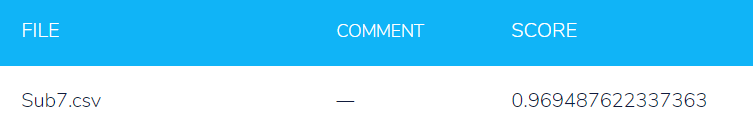